# Chapter 3 
# Starting with Machine Learning 1/3


# Contents #
***
- [x] Linear regression
- [ ] The MNIST dataset
- [ ] Classifiers
- [ ] The nearest neighbor algorithm
- [ ] Data clustering
- [ ] The k-means algorithm


## The linear regression algorithm
***
Our goal is to build a model by which to predict the values of a dependent variable from the values of one or more independent variables.

The relationship between these two variables is linear; that is, if y is the dependent variable and x the independent, then the linear relationship between the two variables will look like this: 
<BR>
<font size="+2" color="#d45353"><center>y = Ax + b</center></font>
<center><img src="imgs\linearRegression.png" width="50%" height="50%"></center>
    

## Data model 
<HR>
We mentioned earlier that the relationship between our variables is linear, that is: y = Ax + b, where A and b are constants. To test our algorithm, we need data points in a two-dimensional space.

In [1]:
# We start by importing the Python library NumPy: 
import numpy as np

# Then we define the number of points we want to draw: 
number_of_points = 500

# We initialize the following two lists: (These points will contain the generated points.)
x_point = []     
y_point = []


In [2]:
# We then set the two constants that will appear in the linear relation of y with x:
a = 0.22
b = 0.78

#Via NumPy's random.normal function, we generate 300 random points around the regression equation y = 0.22x + 0.78:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])

In [3]:
# Finally, view the generated points by matplotlib:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend()
plt.show()

<Figure size 1000x600 with 1 Axes>

## Cost functions and gradient descent 
<HR>
The machine learning algorithm that we want to implement with TensorFlow must predict values of y as a function of x data according to our data model. The linear regression algorithm will determine the values of the constants A and b (fixed for our data model), which are then the true unknowns of the problem.

In [4]:
# The first step is to import the tensorflow library:
import tensorflow as tf

#Then define the A and b unknowns, using the TensorFlow tf.Variable:
A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

#The unknown factor A was initialized using a random value between -1 and 1, while the variableb is initially set to zero:
b = tf.Variable(tf.zeros([1]))

#So we write the linear relationship that binds y to x:
y = A * x_point + b 

## Cost Function
<HR>
Now we will introduce, this cost function: that has parameters containing a pair of values A and b to be determined which returns a value that estimates how well the parameters are correct. 

<center><img src="imgs\cost_function.png" width="65%" height="65%"></center>

In this example, our <font color="red">cost function is mean square error</font>. It provides an estimate of the variability of the measures, or more precisely, of the dispersion of values around the average value; a small value of this function corresponds to a best estimate for the unknown parameters A and b.


In [5]:
cost_function = tf.reduce_mean(tf.square(y - y_point)) 

<center><img src="imgs\mean_square_error.png" width="80%" height="80%"></center>

## Gradient descent
<HR> 
To minimize cost_function, we use an optimization algorithm with the gradient descent. Given a mathematical function of several variables, gradient descent allows to find a local minimum of this function. The technique is as follows: 

* Evaluate, at an arbitrary first point of the function's domain, the function itself and its gradient. The gradient indicates the direction in which the function tends to a minimum. 

* Select a second point in the direction indicated by the gradient. If the function for this second point has a value lower than the value calculated at the first point, the descent can continue.

<center><img src="imgs\gradient_descent.png" width="45%" height="45%"></center>


Using TensorFlow, the application of this algorithm is very simple. The instruction are as follows:

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.5) 

Here 0.5 is the learning rate of the algorithm. The learning rate determines how fast or slow we move towards the optimal weights. If it is very large, we skip the optimal solution, and if it is too small, we need too many iterations to converge to the best values. An intermediate value (0.5) is provided, but it must be tuned in order to improve the performance of the entire procedure. We define train as the result of the application of the cost_function (optimizer), through its minimize function:

In [7]:
train = optimizer.minimize(cost_function)

## Testing the model 
<HR>
Now we can test the algorithm of gradient descent on the data model you created earlier. As usual, we have to initialize all the variables:

In [8]:
# model = tf.initialize_all_variables() 
model = tf.global_variables_initializer()

So we build our iteration (20 computation steps), allowing us to determine the best values of A and b, which define the line that best fits the data model. Instantiate the evaluation graph:
 

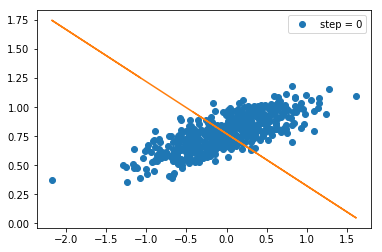

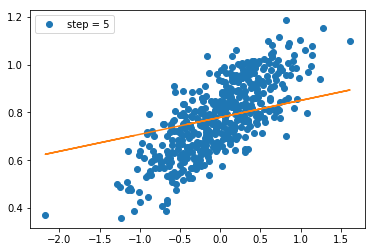

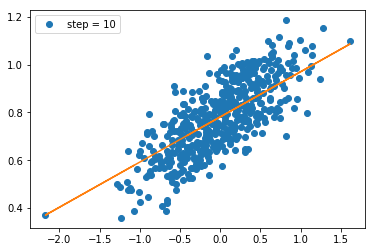

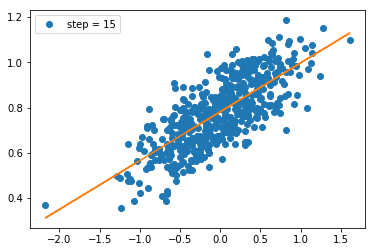

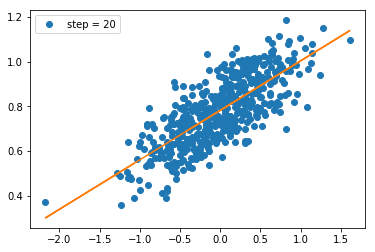

In [9]:
with tf.Session() as session:
    session.run(model)            
    for step in range(0,21): 
        session.run(train)
        if (step % 5) == 0:
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point, session.run(A) * x_point + session.run(b))
            plt.legend()
            plt.show()